# Pulling data and Exploratory Data Analysis
First we import all of the necessary libraries to run the code

In [68]:
import pandas as pd
import numpy as np
from binance.client import Client
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from fbprophet import Prophet

### Pulling data
We can use the Binance API to pull the data on the cryptocurrency of choice. (ex.'BTC','ETH','DOGE',...)
We can also choose the time interval and how far back we want the data to go. For this one we will pull the data from every hour of the last 30 days.

In [69]:
client=Client()
klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1HOUR, "30 day ago UTC")

In [84]:
close_values = [float(x[4]) for x in klines]
time= [x[0] for x in klines]
time=[datetime.fromtimestamp(x/1000).strftime('%Y-%m-%d %H:%M') for x in time]

df=pd.DataFrame({'ds':time,'y':close_values})
df['ds']=pd.to_datetime(df['ds'])
df.tail()

,ds,y
710,2021-05-18 07:00:00,43691.22
711,2021-05-18 08:00:00,43221.40
712,2021-05-18 09:00:00,42969.47
713,2021-05-18 10:00:00,43600.21
714,2021-05-18 11:00:00,43575.28


In [95]:
(df['y'].min(),
df['y'].median(),
df['y'].mean(),
df['y'].max())

(42567.28, 54865.13, 53769.87205594407, 59356.76)

<AxesSubplot:xlabel='ds', ylabel='y'>

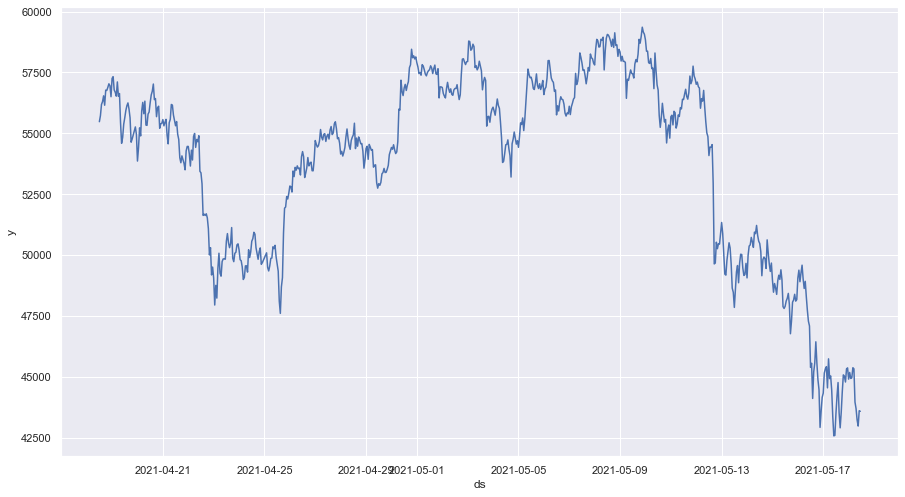

In [106]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.lineplot(df['ds'], df['y'])

<AxesSubplot:xlabel='ds', ylabel='y'>

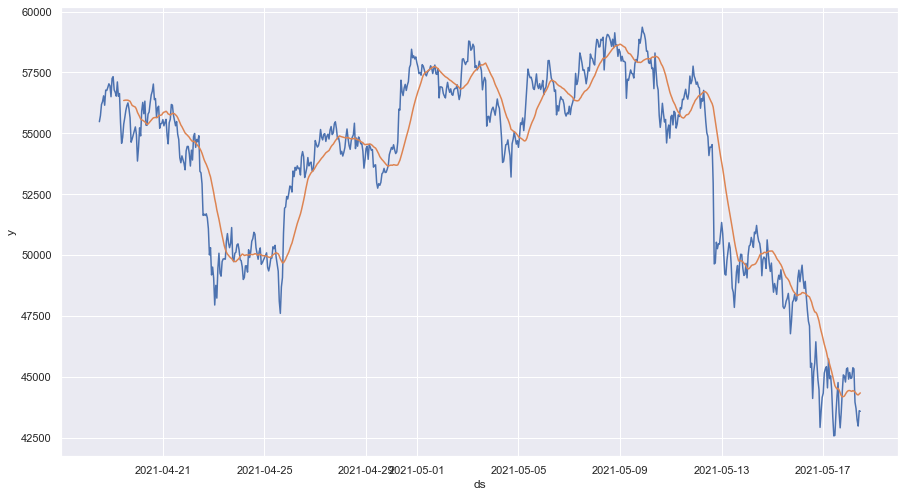

In [107]:
roll=df['y'].rolling(24).mean()
sns.lineplot(df['ds'], df['y'])
sns.lineplot(df['ds'], roll)

In [73]:
change=[]
for x in range(1,len(klines)):
    i=df.iloc[x]['y']-df.iloc[x-1]['y']
    change.append(i)
change=pd.Series(change)

In [97]:
(change.min(),
change.median(),
change.mean(),
change.max())

(-3311.470000000001,
 7.475000000002183,
 -16.664677871148463,
 1833.2300000000032)

<AxesSubplot:>

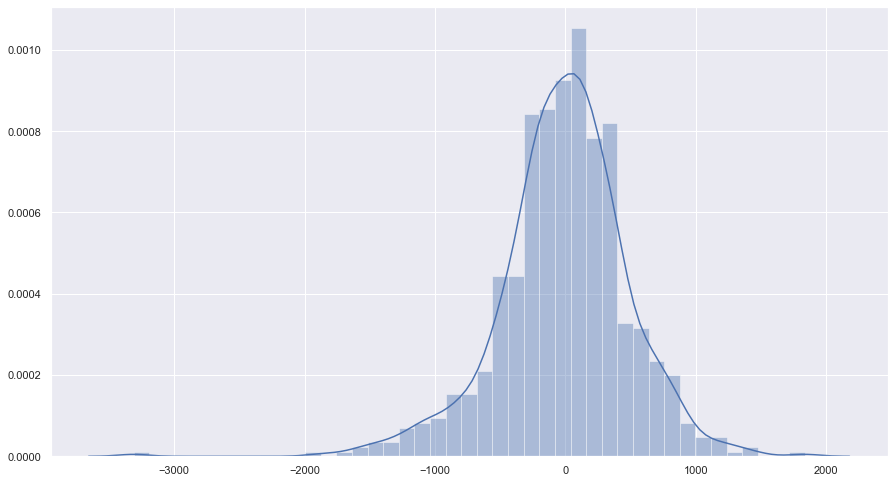

In [111]:
sns.distplot(change)

<AxesSubplot:>

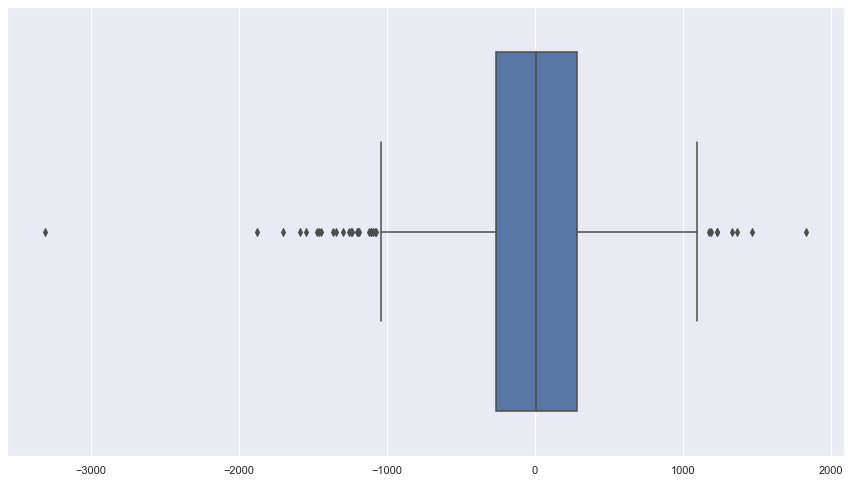

In [110]:
sns.boxplot(change)